In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\user\AppData\Local\Temp\ipykernel_5256\912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'notebook')
import numpy as np
import csv
from tqdm import tqdm
import os
import cv2
import sys

## PTS to CSV

In [5]:
file = pd.read_csv(r'C:\Users\user\58.txt')
new_csv_file = file.to_csv(r'C:\Users\user\58.csv')

In [6]:
df = pd.read_csv('58.csv')
df.head()

,Unnamed: 0,45156132
0,0,-5.627 -3.588 -0.915 -2034 1 1 2
1,1,-5.622 -3.586 -0.918 -2043 1 1 2
2,2,-5.614 -3.590 -0.913 -2037 1 1 1
3,3,-5.614 -3.587 -0.915 -2031 1 1 1
4,4,-5.585 -3.586 -0.915 -2043 1 1 1


In [7]:
# 첫번째 열 삭제하기
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

,45156132
0,-5.627 -3.588 -0.915 -2034 1 1 2
1,-5.622 -3.586 -0.918 -2043 1 1 2
2,-5.614 -3.590 -0.913 -2037 1 1 1
3,-5.614 -3.587 -0.915 -2031 1 1 1
4,-5.585 -3.586 -0.915 -2043 1 1 1


In [8]:
new_csv_file = df.to_csv(r'C:\Users\user\58.csv', index=None) #none을 해야 인덱스 없이 csv만들어짐!!

In [9]:
df2 = pd.read_csv('58.csv', sep=' ')
df2.head()

,45156132,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,-5.627,-3.588,-0.915,-2034,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN
1,-5.622,-3.586,-0.918,-2043,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,-5.614,-3.590,-0.913,-2037,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,-5.614,-3.587,-0.915,-2031,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,-5.585,-3.586,-0.915,-2043,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#불필요한 열 삭제하기
df2 = df2.drop(['Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'], axis = 1)

In [11]:
#각 열에 원하는 인덱스 달기
df2.columns = ['x', 'y', 'z', 'I', 'r', 'g','b']
df2.head()

,x,y,z,I,r,g,b
0,-5.627,-3.588,-0.915,-2034,1,1,2
1,-5.622,-3.586,-0.918,-2043,1,1,2
2,-5.614,-3.590,-0.913,-2037,1,1,1
3,-5.614,-3.587,-0.915,-2031,1,1,1
4,-5.585,-3.586,-0.915,-2043,1,1,1


In [12]:
#이제 완벽하게 인덱스 없고 xyzIrgb로 구성된 csv 만듦.
new_csv_file = df2.to_csv(r'C:\Users\user\58.csv', index=None)

In [13]:
df3 = pd.read_csv('58.csv')
df3

,x,y,z,I,r,g,b
0,-5.627,-3.588,-0.915,-2034,1,1,2
1,-5.622,-3.586,-0.918,-2043,1,1,2
2,-5.614,-3.590,-0.913,-2037,1,1,1
3,-5.614,-3.587,-0.915,-2031,1,1,1
4,-5.585,-3.586,-0.915,-2043,1,1,1
...,...,...,...,...,...,...,...
45156127,4.070,5.759,0.011,-407,90,103,111
45156128,4.163,5.884,0.014,-559,106,114,111
45156129,4.334,6.127,0.006,134,103,109,109
45156130,4.387,6.195,0.011,-106,94,108,103


##  포인트클라우드 픽셀로 뿌리기

In [14]:
#빈 배열 만들기
def list_import(x):
    new_list = []
    for i in x:
        new_list.append(i)   #array.append(x)형태로 사용
    
    return new_list

In [15]:
x = df3['x']
y = df3['y']

x_list = list_import(x)
y_list = list_import(y)

print(x_list[0:10])

[-5.627, -5.622, -5.614, -5.614, -5.585, -5.582, -5.582, -5.588, -5.588, -5.58]


In [20]:
#일차방정식 구하기
x1 = -0.108
y1 = 4.439
x2 = -3.867
y2 = 0.408

m = (y2-y1)/(x2-x1)
print('m:',m)
b = y1 - (m * x1)
print('b:',b)
cond = m * x + b
print(cond[0:10])

m: 1.0723596701250333
b: 4.554814844373504
0   -1.479353
1   -1.473991
2   -1.465412
3   -1.465412
4   -1.434314
5   -1.431097
6   -1.431097
7   -1.437531
8   -1.437531
9   -1.428952
Name: x, dtype: float64


In [21]:
#조건에 해당하는 y값의 인덱스만 가져오기 -> np.where 사용하면 인덱스값 가져옴
y_index = np.where(y>cond)
print(y_index[0])

[ 9246380  9246406  9246408 ... 38060203 38060204 38060205]


In [22]:
#해당 인덱스에 대한 x,y,z,r,g,b 데이터 가져오기

export_data = []
for i in y_index[0]:
    export_data.append(df3.loc[i])
    
print(export_data[0])

x      -3.889
y       0.387
z      -1.301
I   -2038.000
r       1.000
g       1.000
b       3.000
Name: 9246380, dtype: float64


In [23]:
df4 = pd.DataFrame(export_data, columns=['x','y','z','r','g','b'])
df4

,x,y,z,r,g,b
9246380,-3.889,0.387,-1.301,1.0,1.0,3.0
9246406,-3.867,0.409,-1.298,0.0,11.0,12.0
9246408,-3.864,0.413,-1.296,1.0,2.0,1.0
9246509,-3.859,0.440,-1.301,1.0,1.0,1.0
9246510,-3.849,0.434,-1.300,1.0,1.0,1.0
...,...,...,...,...,...,...
38060201,-0.367,4.614,1.569,27.0,33.0,43.0
38060202,-0.367,4.623,1.575,27.0,33.0,43.0
38060203,-0.370,4.627,1.572,27.0,33.0,43.0
38060204,-0.370,4.630,1.575,27.0,33.0,43.0


In [24]:
#rgb float형 int로 바꾸기
cols = ['r', 'g', 'b']
df4[cols] = df4[cols].applymap(np.int64)
df4

,x,y,z,r,g,b
9246380,-3.889,0.387,-1.301,1,1,3
9246406,-3.867,0.409,-1.298,0,11,12
9246408,-3.864,0.413,-1.296,1,2,1
9246509,-3.859,0.440,-1.301,1,1,1
9246510,-3.849,0.434,-1.300,1,1,1
...,...,...,...,...,...,...
38060201,-0.367,4.614,1.569,27,33,43
38060202,-0.367,4.623,1.575,27,33,43
38060203,-0.370,4.627,1.572,27,33,43
38060204,-0.370,4.630,1.575,27,33,43


In [27]:
new_csv_file = df4.to_csv(r'C:\Users\user\58_edit.csv', index=None)
df5 = pd.read_csv('58_edit.csv')
df5

,x,y,z,r,g,b
0,-3.889,0.387,-1.301,1,1,3
1,-3.867,0.409,-1.298,0,11,12
2,-3.864,0.413,-1.296,1,2,1
3,-3.859,0.440,-1.301,1,1,1
4,-3.849,0.434,-1.300,1,1,1
...,...,...,...,...,...,...
3917337,-0.367,4.614,1.569,27,33,43
3917338,-0.367,4.623,1.575,27,33,43
3917339,-0.370,4.627,1.572,27,33,43
3917340,-0.370,4.630,1.575,27,33,43


<IPython.core.display.Javascript object>


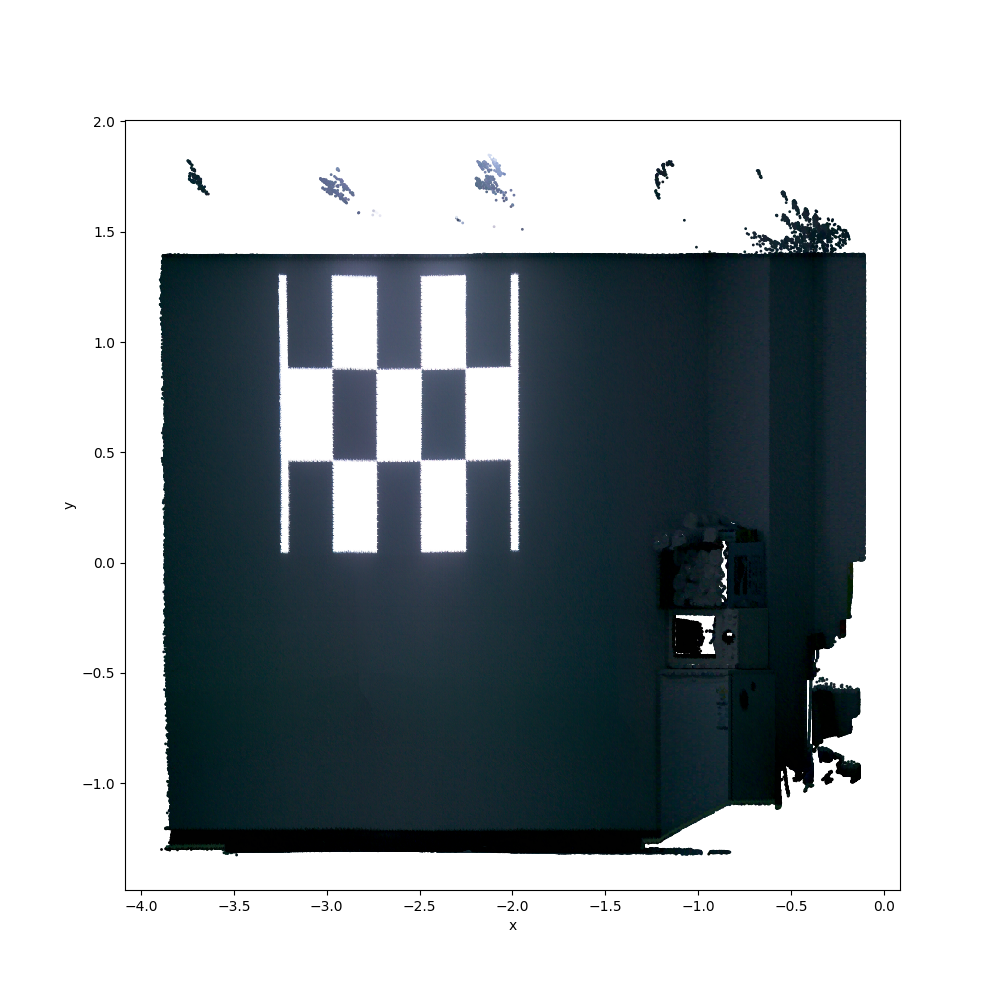

In [33]:
data = pd.read_csv('58_edit.csv')

x = data['x']
y = data['y']
z = data['z']
r = data['r']
g = data['g']
b = data['b']

numtest = 3917342
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

for i in range(numtest):
    px[i] = x[i]
    py[i] = y[i]
    pz[i] = z[i]
    #pz[i] = 0
    py[i] = 0
    #px[i] = 0
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1)

ax.scatter(px,pz, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.xlim([0,800])
#plt.ylim([0,800])

plt.show()

<IPython.core.display.Javascript object>


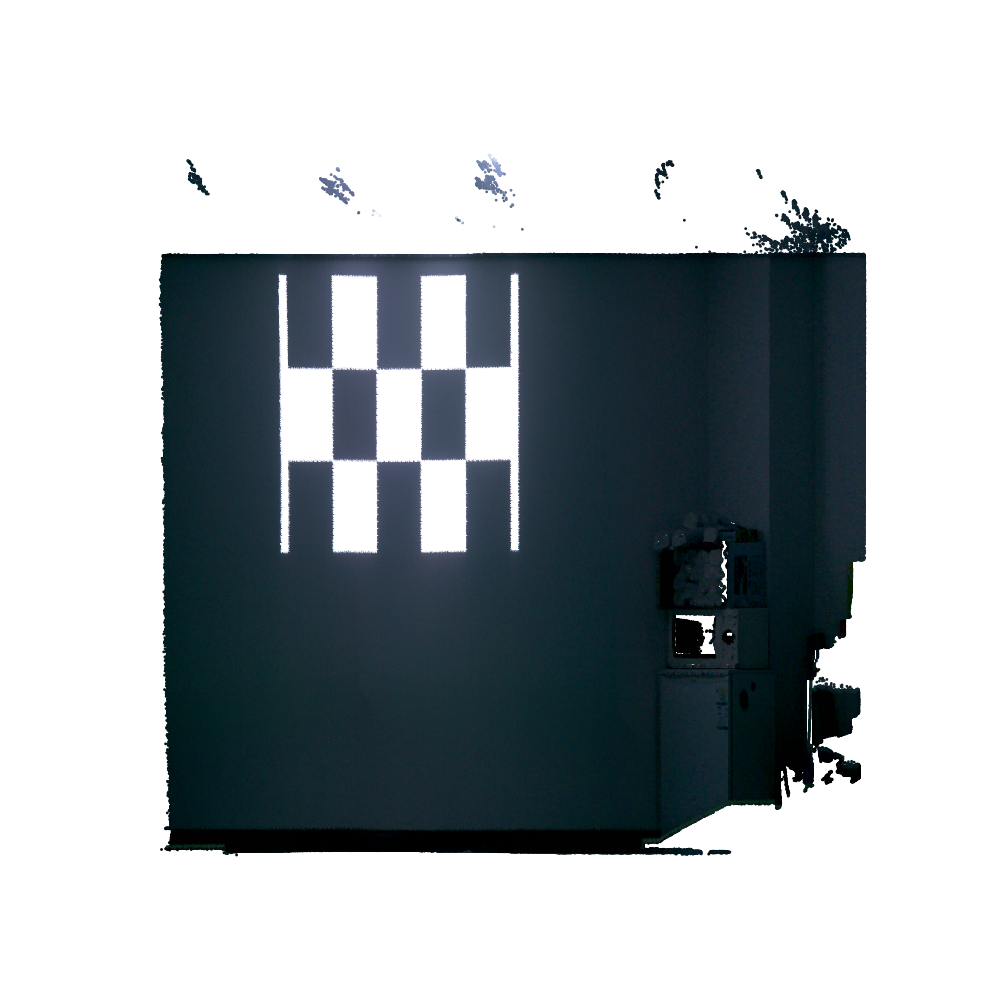

In [35]:
##눈금없이 이미지 저장
fig = plt.figure(figsize=(10,10), frameon=False)
ax = fig.add_subplot(1,1,1)

ax.scatter(px,pz, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.xlim([0,800])
#plt.ylim([0,800])

#사진 저장하기
ax.axis('off')
plt.show()
plt.savefig('58.png', bbox_inches='tight', pad_inches = 0)

## 해리스 코너 검출 

드래그로 원하는 영역 설정 

In [38]:
isDragging = False                        # 마우스 드래그 상태 저장 
x0, y0, w, h = -1,-1,-1,-1                # 영역 선택 좌표 저장
blue, red = (255,0,0),(0,0,255)           # 색상 값 

def onMouse(event,x,y,flags,param):       # 마우스 이벤트 핸들 함수  ---①
    global isDragging, x0, y0, w, h, img        # 전역변수 참조
    if event == cv2.EVENT_LBUTTONDOWN:    # 왼쪽 마우스 버튼 다운, 드래그 시작 ---②
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:    # 마우스 움직임 ---③
        if isDragging:                    # 드래그 진행 중
            img_draw = img.copy()         # 사각형 그림 표현을 위한 이미지 복제
            cv2.rectangle(img_draw, (x0, y0), (x, y), blue, 2) # 드래그 진행 영역 표시
            cv2.imshow('img', img_draw)    # 사각형 표시된 그림 화면 출력
    elif event == cv2.EVENT_LBUTTONUP:    # 왼쪽 마우스 버튼 업 ---④
        if isDragging:                     # 드래그 중지
            isDragging = False          
            w = x - x0                    # 드래그 영역 폭 계산
            h = y - y0                    # 드래그 영역 높이 계산
            print("x:%d, y:%d, w:%d, h:%d" % (x0, y0, w, h))
            
            if w > 0 and h > 0:          # 폭과 높이가 양수이면 드래그 방향이 옳음 ---⑤
                img_draw = img.copy()     # 선택 영역에 사각형 그림을 표시할 이미지 복제
                # 선택 영역에 빨간 사각형 표시
                cv2.rectangle(img_draw, (x0, y0), (x, y), red, 2) 
                cv2.imshow('img', img_draw) # 빨간 사각형 그려진 이미지 화면 출력
                #roi = img[y0:y0+h, x0:x0+w] # 원본 이미지에서 선택 영영만 ROI로 지정 ---⑥
                #cv2.imshow('cropped', roi)  # ROI 지정 영역을 새창으로 표시
                #cv2.moveWindow('cropped', 0, 0) # 새창을 화면 좌측 상단에 이동
                #cv2.imwrite('./cropped.jpg', roi)   # ROI 영역만 파일로 저장 ---⑦
                #print("croped.")
            else:
                cv2.imshow('img', img)  # 드래그 방향이 잘못된 경우 사각형 그림이 없는 원본 이미지 출력
                print("좌측 상단에서 우측 하단으로 영역을 드래그 하세요.")

img = cv2.imread(r'C:\Users\user\58.png')
cv2.imshow('img', img)
cv2.setMouseCallback('img', onMouse) # 마우스 이벤트 등록 ---⑧
cv2.waitKey()
cv2.destroyAllWindows()

x:145, y:147, w:259, h:293


In [39]:
print(x0)
print(y0)
print(w)
print(h)

145
147
259
293


<IPython.core.display.Javascript object>


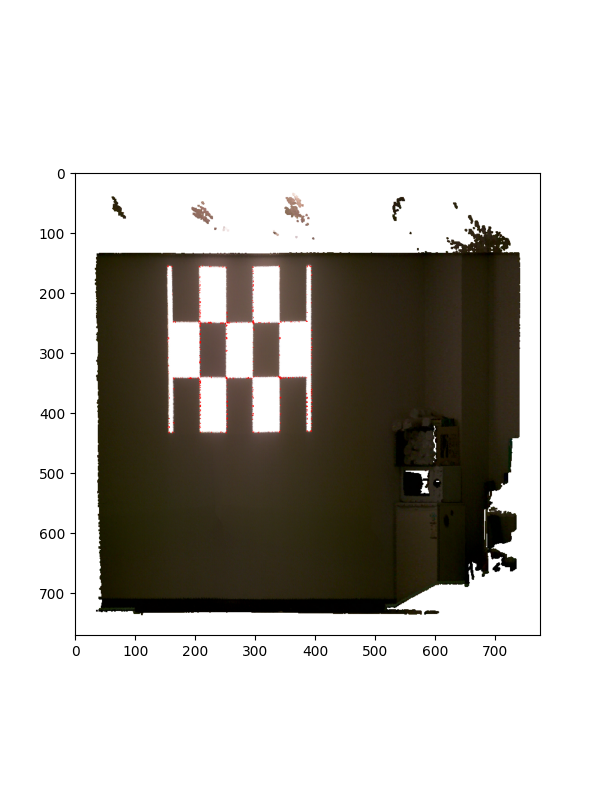

In [33]:
x = x0
y = y0
roi = img[y:y+h, x:x+w]     #원하는 구간만 이미지 지정

#해리스 코너 디텍트
roi_gray = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
roi_gray = np.float32(roi_gray)
dst = cv2.cornerHarris(roi_gray,2,3,0.04)
roi[dst>0.01*dst.max()]=[255,0,0]

plt.figure(figsize=(6,8))
plt.imshow(img)

cv2.imshow('dst',img)
#cv2.imwrite('./croped.jpg',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## GFTT 코너 디텍트 

(247, 282)
(11, 284)
(9, 8)
(62, 9)
(194, 191)
(197, 100)
(239, 98)
(106, 285)
(107, 195)
(19, 195)
(19, 100)
(241, 8)
(151, 284)
(152, 102)
(194, 8)
(63, 284)
(194, 283)
(108, 101)
(151, 9)
(63, 201)
(61, 99)
(239, 194)


<IPython.core.display.Javascript object>


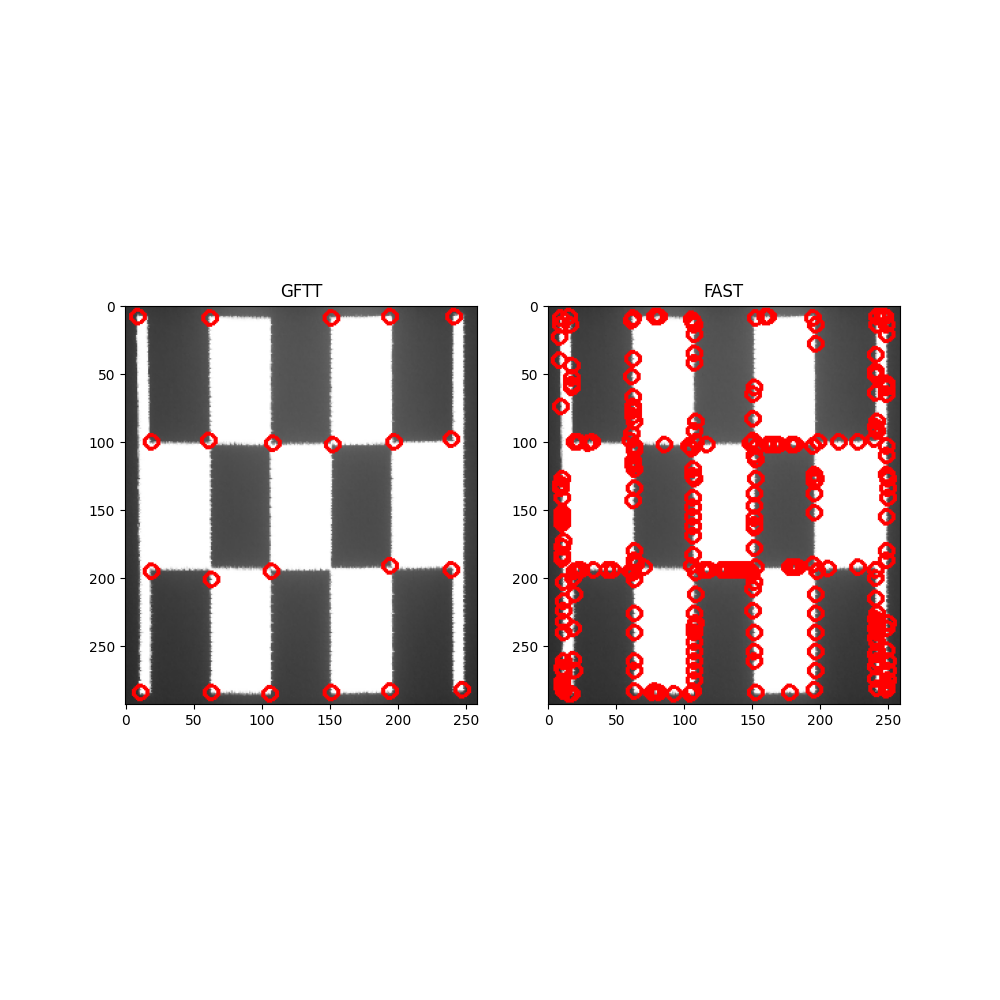

In [40]:
#src = cv2.imread('58.png', cv2.IMREAD_GRAYSCALE)

x = x0
y = y0

roi = img[y:y+h, x:x+w]     #원하는 구간만 이미지 지정

# GFTT 코너 검출 방법 -> dst1
src = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY) #백그라운드 흑백으로 바꾸는 것 추가
corners = cv2.goodFeaturesToTrack(src, 22, 0.01, 10)

dst1 = cv2.cvtColor(src,cv2.COLOR_GRAY2BGR)

if corners is not None:
    for i in range(corners.shape[0]): # 코너 갯수만큼 반복문
        pt = (int(corners[i, 0, 0]), int(corners[i, 0, 1])) # x, y 좌표 받아오기
        cv2.circle(dst1, pt, 5, (255, 0, 0), 2) # 받아온 위치에 원
        print(pt)
        

# Fast 코너 검출 -> dst2
fast = cv2.FastFeatureDetector_create(60) # 임계값 60 지정
keypoints = fast.detect(src) # Keypoint 객체를 리스트로 받음

dst2 = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
    pt = (int(kp.pt[0]), int(kp.pt[1])) # kp안에 pt좌표가 있음
    cv2.circle(dst2, pt, 5, (255, 0, 0), 2)

#그리기
plt.figure(figsize=(10,10))

imgae1=plt.subplot(1,2,1)
imgae1.set_title('GFTT')
#plt.axis('off')
plt.imshow(dst1)

imgae2=plt.subplot(1,2,2)
imgae2.set_title('FAST')
#plt.axis('off')
plt.imshow(dst2)

plt.show()
  
#cv2.imshow('src', src)
#cv2.imshow('dst1', dst1)
#cv2.imshow('dst2', dst2)
#cv2.waitKey()
#cv2.destroyAllWindows()


In [36]:
x = x0
y = y0
roi = img[y:y+h, x:x+w]     #원하는 구간만 이미지 지정


filename = '58.png'
image = cv2.imread(filename)

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,150,0.01,10)      #cv2.goodFeaturesToTrack(입력 이미지, 코너 최댓값, 코너 품질, 최소 거리, 마스크, 블록 크기, 해리스 코너 검출기 유/무, 해리스 코너 계수)
corners = np.int0(corners)

for i in corners:
    x,y = i.ravel()
    cv2.circle(image,(x,y),3,255,-1)
    print('x1:%f,y1:%f' % (x,y))
    print('x2:%d,y2:%d' % (x,y))
    
#plt.imshow(image),plt.show()
cv2.imshow('gftt', image)
cv2.waitKey()
cv2.destroyAllWindows()

x:36,y:729
x:714,y:113
x:111,y:736
x:711,y:518
x:520,y:725
x:600,y:440
x:695,y:549
x:580,y:514
x:571,y:128
x:583,y:734
x:676,y:662
x:694,y:124
x:720,y:640
x:703,y:559
x:686,y:97
x:695,y:102
x:663,y:676
x:708,y:99
x:551,y:496
x:602,y:514
x:709,y:652
x:559,y:100
x:41,y:612
x:582,y:131
x:541,y:47
x:647,y:686
x:644,y:126
x:534,y:55
x:666,y:116
x:620,y:113
x:696,y:661
x:725,y:663
x:724,y:119
x:44,y:711
x:576,y:528
x:531,y:68
x:588,y:496
x:675,y:92
x:712,y:131
x:665,y:92
x:41,y:627
x:695,y:530
x:36,y:134
x:78,y:63
x:690,y:560
x:65,y:50
x:688,y:633
x:38,y:534
x:678,y:672
x:40,y:595
x:708,y:640
x:62,y:40
x:554,y:734
x:675,y:102
x:588,y:532
x:631,y:50
x:656,y:100
x:717,y:564
x:726,y:498
x:654,y:120
x:695,y:642
x:662,y:648
x:658,y:661
x:598,y:473
x:658,y:131
x:617,y:132
x:535,y:79
x:34,y:181
x:729,y:442
x:38,y:385
x:84,y:75
x:633,y:131
x:605,y:731
x:40,y:693
x:598,y:421
x:660,y:83
x:52,y:731
x:735,y:659
x:576,y:502
x:35,y:257
x:726,y:613
x:685,y:622
x:38,y:569
x:727,y:599
x:40,y:579
x:33,y:159
x